In [18]:
import numpy as np
import pandas as pd


In [19]:
data = pd.read_excel('/content/drive/MyDrive/Dosen/S3/Tugas/Kapita Selekta Algoritma/DataIris100.xlsx')

In [20]:
# Ambil kolom fitur (X1..X4)
X = df[["X1","X2","X3","X4"]].values.astype(float)

# Ambil target (label 0/1)
y = df["Target"].values.astype(int)

# Tambahkan kolom X0 = 1 (bias)
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [21]:
data.head()

,X1,X2,X3,X4,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (100, 5)
Shape y: (100,)


In [24]:
# Split Data

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train:", X_train.shape, y_train.shape)
print("Valid:", X_valid.shape, y_valid.shape)

Train: (80, 5) (80,)
Valid: (20, 5) (20,)


In [36]:
# Define Function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_slp(X_train, y_train, X_valid, y_valid, alpha=0.1, epochs=10):
    w = np.full(X_train.shape[1], 0.5)
    history = {"epoch": [], "loss_train": [], "loss_valid": [], "acc_train": [], "acc_valid": []}

    for ep in range(epochs):
        # --- Training online ---
        for xi, ti in zip(X_train, y_train):
            z = np.dot(w, xi)
            yhat = sigmoid(z)

            grad = (ti - yhat) * yhat * (1-yhat) * xi

            w = w + alpha * grad

        # --- Evaluasi ---
        # Training
        yhat_train = sigmoid(X_train @ w)
        pred_train = (yhat_train >= 0.5).astype(int)
        acc_train = (pred_train == y_train).mean()

        loss_train = 0.5 * np.mean((y_train - yhat_train)**2)

        # Validasi
        yhat_valid = sigmoid(X_valid @ w)
        pred_valid = (yhat_valid >= 0.5).astype(int)
        acc_valid = (pred_valid == y_valid).mean()

        loss_valid = 0.5 * np.mean((y_valid - yhat_valid)**2)

        # Simpan
        history["epoch"].append(ep+1)
        history["loss_train"].append(loss_train)
        history["loss_valid"].append(loss_valid)
        history["acc_train"].append(acc_train)
        history["acc_valid"].append(acc_valid)

        print(f"Epoch {ep+1:02d} | Loss Train: {loss_train:.4f} | Loss Valid: {loss_valid:.4f} | Acc Train: {acc_train:.3f} | Acc Valid: {acc_valid:.3f}")

    return w, history



In [37]:
w_final, hist = train_slp(X_train, y_train, X_valid, y_valid, alpha=0.1, epochs=5)


Epoch 01 | Loss Train: 0.2327 | Loss Valid: 0.2946 | Acc Train: 0.525 | Acc Valid: 0.400
Epoch 02 | Loss Train: 0.0641 | Loss Valid: 0.0732 | Acc Train: 0.850 | Acc Valid: 0.850
Epoch 03 | Loss Train: 0.0248 | Loss Valid: 0.0254 | Acc Train: 1.000 | Acc Valid: 1.000
Epoch 04 | Loss Train: 0.0140 | Loss Valid: 0.0131 | Acc Train: 1.000 | Acc Valid: 1.000
Epoch 05 | Loss Train: 0.0096 | Loss Valid: 0.0083 | Acc Train: 1.000 | Acc Valid: 1.000


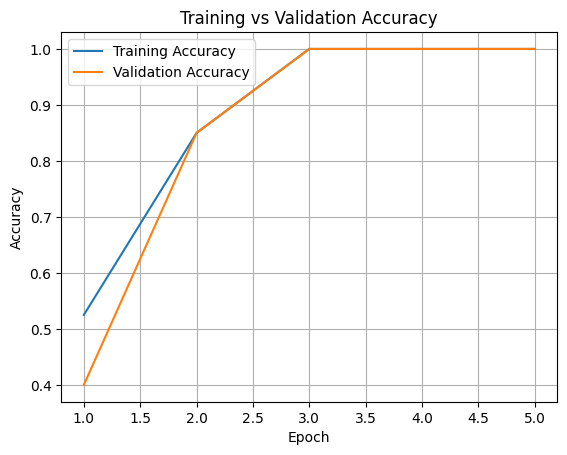

In [38]:
import matplotlib.pyplot as plt

plt.plot(hist["epoch"], hist["acc_train"], label="Training Accuracy")
plt.plot(hist["epoch"], hist["acc_valid"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


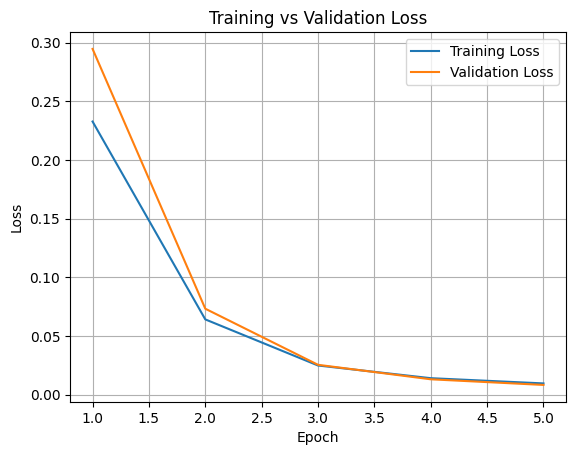

In [39]:
import matplotlib.pyplot as plt

plt.plot(hist["epoch"], hist["loss_train"], label="Training Loss")
plt.plot(hist["epoch"], hist["loss_valid"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

